In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

In [3]:
data_df.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [4]:
data_df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
data_df.shape

(23066, 19)

In [6]:
data_df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [8]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [9]:
data_df.duplicated().sum()

0

Treat missing values in CPC, CTR and CPM using the formula given.

In [10]:
#Formula Based Definition for CTR Missing values
def CTR(x):
    Clicks=data_df.Clicks
    Impression=data_df.Impressions
    CTR = (Clicks/Impression)*100
    return CTR

In [11]:
data_df['CTR']= data_df[['CTR']].apply(lambda x: CTR(x))

In [12]:
data_df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN


In [13]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                         0
CPM                      4736
CPC                      4736
dtype: int64

In [14]:
#Formula Based Definition for CPC Missing values
def CPC(x):
    Spend=data_df.Spend
    Clicks=data_df.Clicks
    CPC = (Spend/Clicks)
    return CPC

In [15]:
data_df['CPC']= data_df[['CPC']].apply(lambda x: CPC(x))

In [16]:
data_df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,NaN,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,NaN,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,NaN,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,NaN,0.07


In [17]:
#Formula Based Definition for CPM Missing values
def CPM(x):
    Spend=data_df.Spend
    Impressions=data_df.Impressions
    CPM = (Spend/Impressions)*1000
    return CPM

In [18]:
data_df['CPM']= data_df[['CPM']].apply(lambda x: CPM(x))

In [19]:
data_df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


In [20]:
data_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [21]:
drop_df = data_df.drop(['Timestamp','InventoryType','Ad - Length','Ad- Width','Ad Size','Ad Type','Platform','Device Type','Format','Available_Impressions','Matched_Queries','Fee','Revenue'], axis=1)

In [22]:
#Check for presence of missing values in each feature
drop_df.isnull().sum()

Impressions    0
Clicks         0
Spend          0
CTR            0
CPM            0
CPC            0
dtype: int64

Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

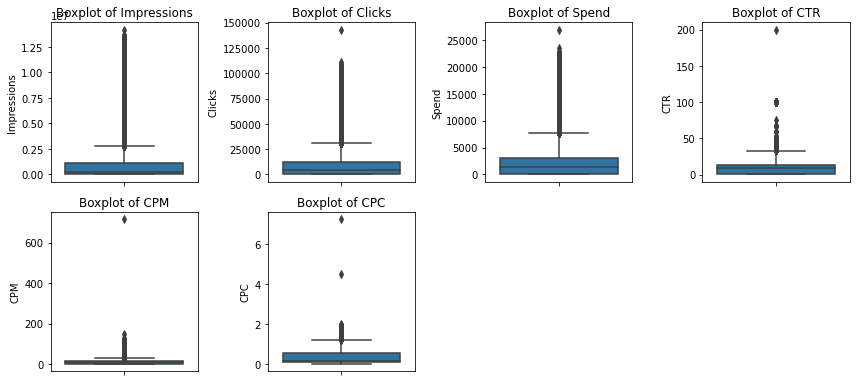

In [23]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = drop_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = drop_df[feature_list[i]], data = drop_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [24]:
drop_df.head()

,Impressions,Clicks,Spend,CTR,CPM,CPC
0,323,1,0.0,0.309598,0.0,0.0
1,285,1,0.0,0.350877,0.0,0.0
2,355,1,0.0,0.281690,0.0,0.0
3,495,1,0.0,0.202020,0.0,0.0
4,242,1,0.0,0.413223,0.0,0.0


 Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [25]:
#Scale the data
from scipy.stats import zscore
df_scaled = drop_df.apply(zscore)

In [26]:
#Check the data post scaling
df_scaled.head()

,Impressions,Clicks,Spend,CTR,CPM,CPC
0,-0.510918,-0.615311,-0.665372,-0.874593,-0.927054,-0.986615
1,-0.510933,-0.615311,-0.665372,-0.870136,-0.927054,-0.986615
2,-0.510905,-0.615311,-0.665372,-0.877606,-0.927054,-0.986615
3,-0.510847,-0.615311,-0.665372,-0.886208,-0.927054,-0.986615
4,-0.510951,-0.615311,-0.665372,-0.863404,-0.927054,-0.986615


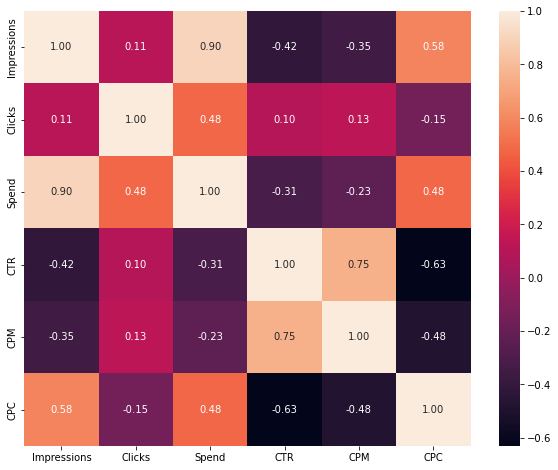

In [27]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df_scaled.corr(), annot=True,fmt='.2f');

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X = StandardScaler()

In [30]:
scaled_df = X.fit_transform(drop_df)

In [31]:
scaled_df

array([[-0.51091769, -0.61531138, -0.66537187, -0.87459265, -0.92705387,
        -0.98661455],
       [-0.51093334, -0.61531138, -0.66537187, -0.87013569, -0.92705387,
        -0.98661455],
       [-0.51090452, -0.61531138, -0.66537187, -0.87760581, -0.92705387,
        -0.98661455],
       ...,
       [-0.51105024, -0.61531138, -0.66535957,  9.88896203,  4.59319464,
        -0.8400924 ],
       [-0.51105024, -0.61531138, -0.66535466,  9.88896203,  6.80129404,
        -0.78148354],
       [-0.51104983, -0.61531138, -0.66534974,  4.4904711 ,  4.04116979,
        -0.72287468]])

 Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

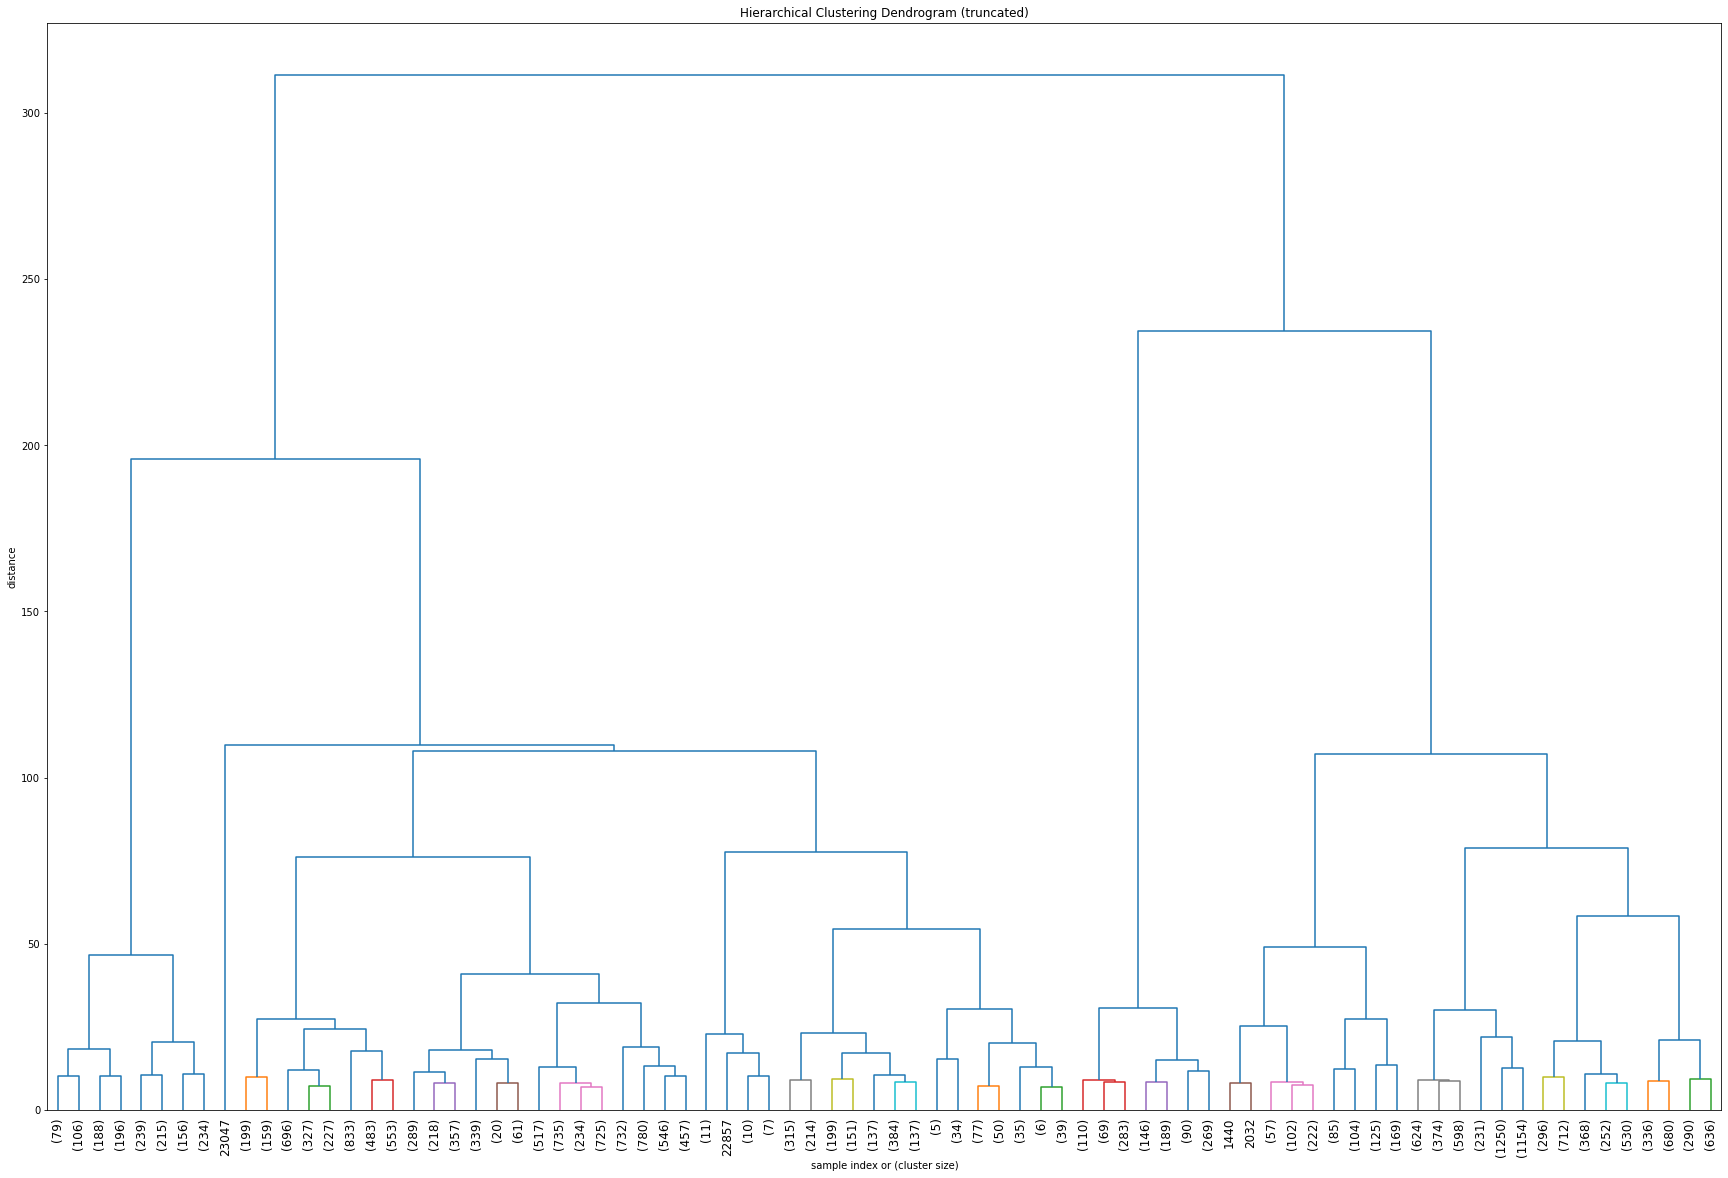

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(30, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

 Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [33]:
k_means = KMeans(n_clusters = 2)

In [34]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [35]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
k_means.inertia_

89809.22505261512

In [37]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

61144.351759516954

In [38]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

41871.94120767978

In [39]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

138396.0000000001

In [40]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

35556.05986796617

In [41]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

29769.826973943975

In [42]:
wss =[] 

In [43]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [44]:
wss

[138396.0000000001,
 89809.23360308052,
 61144.31082275286,
 41871.99651917778,
 35476.08128373598,
 29769.98056760124,
 24750.55660170567,
 21040.322124777027,
 18041.689402383927,
 14957.279417064683]

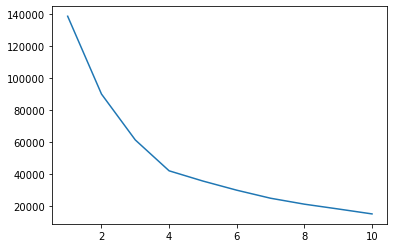

In [45]:
plt.plot(range(1,11), wss);

In [46]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [47]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,1
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,1
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,1


Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
silhouette_score(scaled_df,labels)

0.5385308525008989

In [50]:
sil_width = silhouette_samples(scaled_df,labels)

In [51]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,1,0.140537
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,1,0.139496
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,1,0.141235
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,1,0.143202
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,1,0.137900


In [52]:
silhouette_samples(scaled_df,labels).min()

-0.01714149179677784

 Profile the ads based on optimum number of clusters using silhouette score and your domain understanding 

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Clicks'>

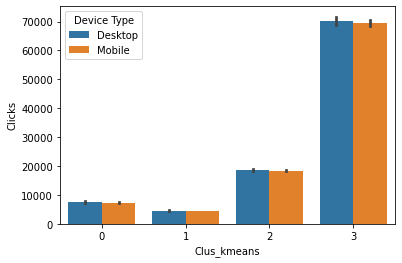

In [53]:
import seaborn as sns

sns.barplot(data=data_df, x="Clus_kmeans", y="Clicks", hue="Device Type")

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Spend'>

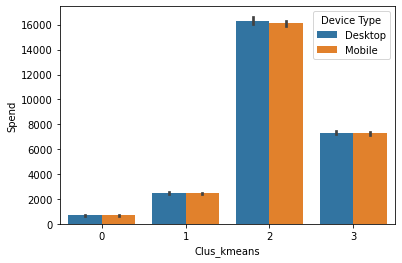

In [54]:
sns.barplot(data=data_df, x="Clus_kmeans", y="Spend", hue="Device Type")

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Revenue'>

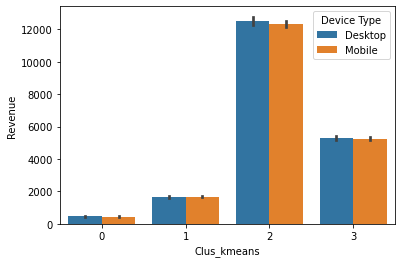

In [55]:
sns.barplot(data=data_df, x="Clus_kmeans", y="Revenue", hue="Device Type")

<AxesSubplot:xlabel='Clus_kmeans', ylabel='CPM'>

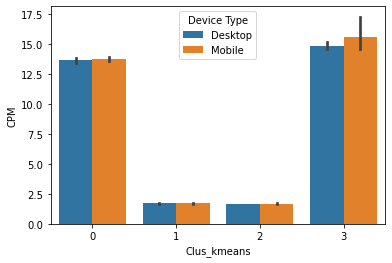

In [56]:
sns.barplot(data=data_df, x="Clus_kmeans", y="CPM", hue="Device Type")

<AxesSubplot:xlabel='Clus_kmeans', ylabel='CTR'>

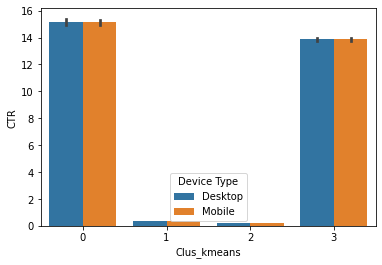

In [57]:
sns.barplot(data=data_df, x="Clus_kmeans", y="CTR", hue="Device Type")

<AxesSubplot:xlabel='Clus_kmeans', ylabel='CPC'>

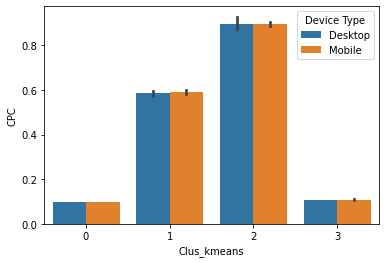

In [58]:
sns.barplot(data=data_df, x="Clus_kmeans", y="CPC", hue="Device Type")

Q2.

Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [59]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Read the data
df = pd.read_excel("PCA India Data_Census.xlsx")

In [61]:
#Check the first few observations
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [62]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [63]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [64]:
#Check for presence of missing values in each feature
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [65]:
#Note: AQI and AQI_Bucket are dependent features
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['State', 'Area Name'], axis = 1)

In [66]:
#Dataframe suitable for PCA
df_pca.head(10)

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
5,1,6,16345,25290,37426,6155,5294,2588,4000,7796,...,1808,3536,1277,2374,229,256,19,71,283,835
6,1,7,12510,22793,30491,3928,3200,5357,6906,988,...,502,561,160,283,133,120,11,19,198,139
7,1,8,9414,22960,30509,4246,4099,0,0,945,...,849,878,168,321,385,265,50,94,246,198
8,1,9,3814,10319,13058,1646,1779,0,0,1749,...,515,901,108,280,218,234,49,144,140,243
9,1,10,15095,39014,52278,6269,5704,11,3,200,...,308,432,10,29,36,22,16,134,246,247


In [67]:
#Check the number of features
len(df_pca.columns)

59

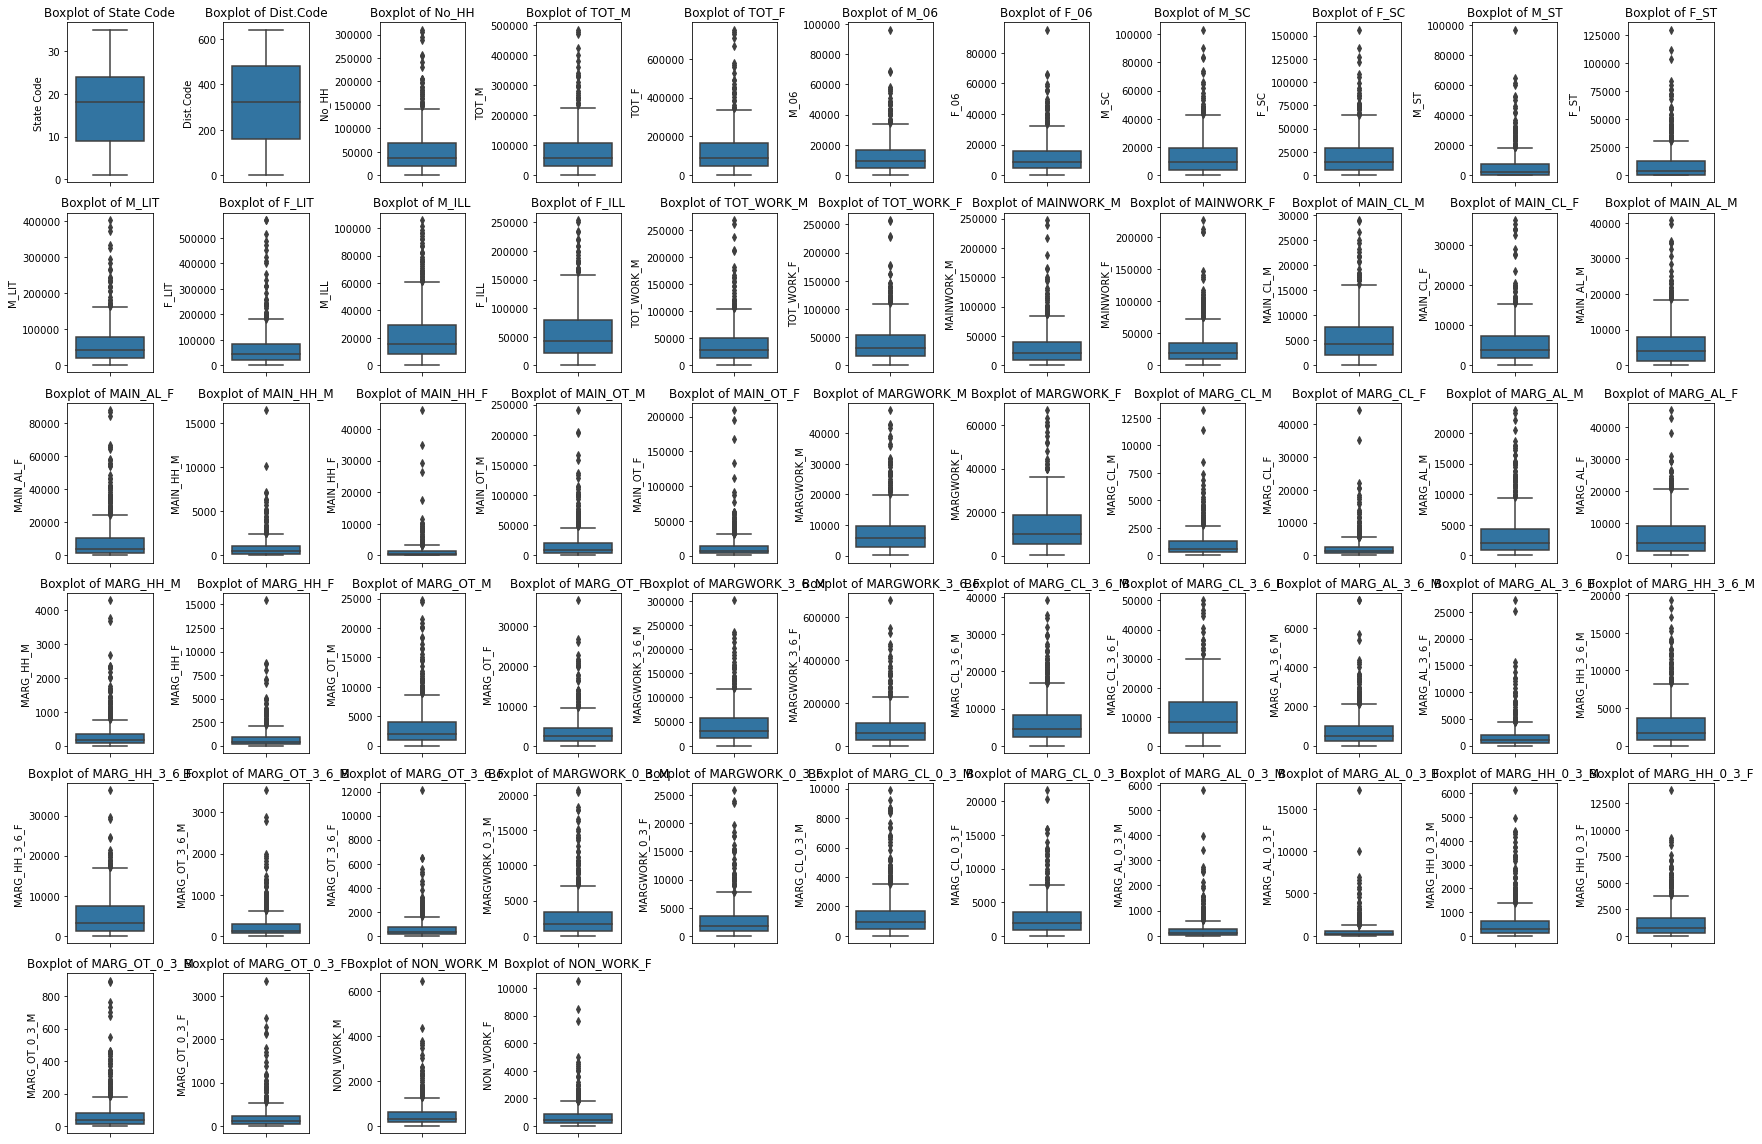

In [68]:
#Check for presence of outliers in each feature
plt.figure(figsize = (24,16))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(6, 11, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [69]:
#Check the descriptive stats to observe scale issues between the variables
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [70]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [71]:
#Check the data post scaling
df_pca_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [72]:
df_pca_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,-1.121325e-15,1.000782,-1.710782,-0.861446,0.094057,0.731060,1.898897
Dist.Code,640.0,-5.169476e-17,1.000782,-1.729347,-0.864673,0.000000,0.864673,1.729347
No_HH,640.0,7.736867e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-1.864828e-16,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-2.983724e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-2.654127e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,2.081668e-18,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,-1.769418e-17,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,1.283695e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-8.291978e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281


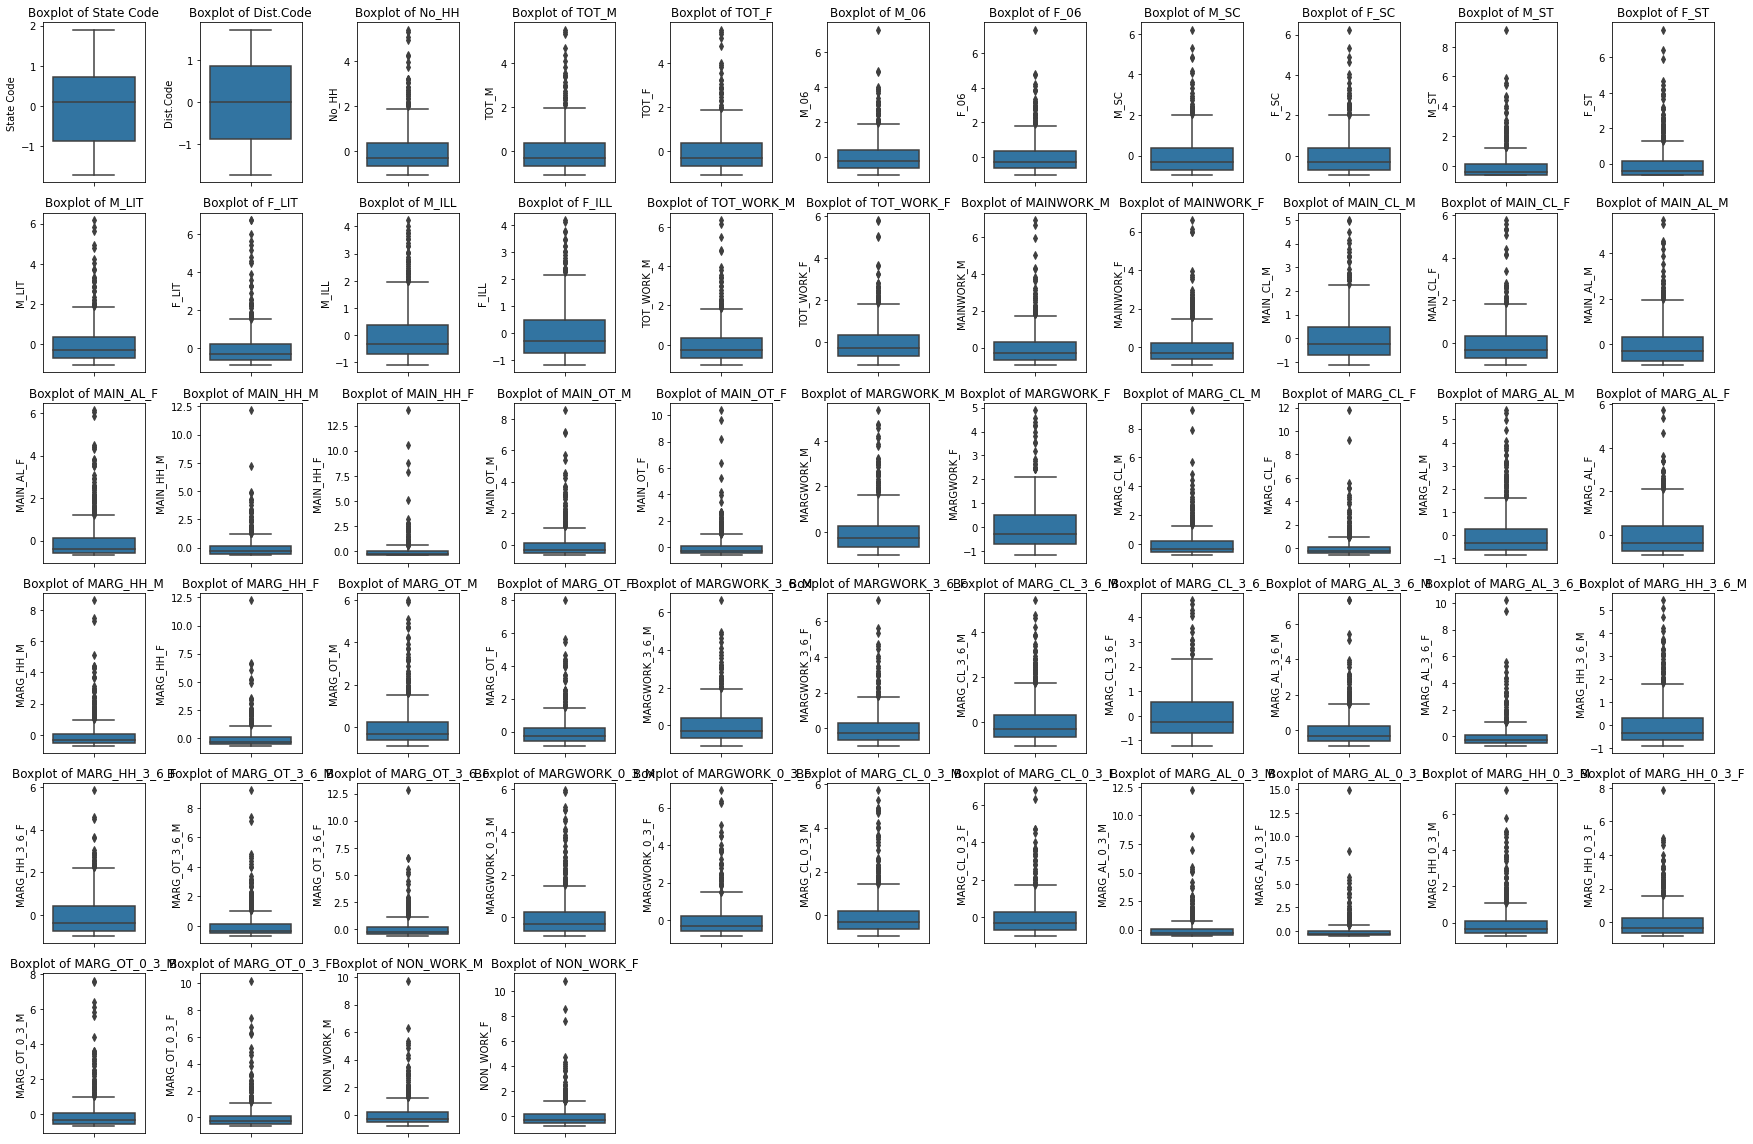

In [90]:
#Check for comparision of boxplot of outliers after scaling in each feature
plt.figure(figsize = (24,16))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(6, 11, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

 Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [74]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA()
data_reduced = pca.fit_transform(df_pca_scaled)
data_reduced.transpose()

array([[-4.71938093e+00, -4.87329665e+00, -6.06294775e+00, ...,
        -6.18034109e+00, -6.10874064e+00, -5.78130461e+00],
       [ 7.17504178e-01,  4.92000931e-01,  2.33750925e-01, ...,
        -1.21626611e+00, -1.24897987e+00, -1.50149133e+00],
       [ 1.63226570e+00,  1.75212655e+00,  1.33306811e+00, ...,
        -3.46108457e-01, -2.79497463e-01, -1.86130470e-01],
       ...,
       [ 1.26815935e-15,  3.46807483e-16,  8.84667498e-16, ...,
         5.27122640e-16, -4.97744437e-17,  2.69483142e-16],
       [ 3.87172096e-16, -7.94875308e-17,  5.48704910e-17, ...,
        -9.21701427e-16, -2.00943846e-16, -8.61136467e-16],
       [-9.58894194e-16, -6.31627312e-16, -1.46111493e-15, ...,
        -1.22443533e-16, -1.24754045e-16, -5.37517649e-17]])

In [75]:
data_reduced.shape

(640, 59)

In [76]:
print('Eigen Vectors \n')
pd.DataFrame(pca.components_)

Eigen Vectors 



,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,3.007005e-02,3.007514e-02,1.564325e-01,0.167038,0.165702,1.618708e-01,1.622663e-01,1.510676e-01,1.514835e-01,2.766359e-02,...,0.149445,0.139705,0.051646,0.040969,0.121254,0.115790,0.139260,0.131869,0.150220,0.131179
1,-1.627825e-01,-1.588218e-01,-1.283222e-01,-0.080861,-0.101111,-1.275320e-02,-1.167383e-02,-3.562710e-02,-4.773171e-02,8.893102e-03,...,0.154508,0.174434,0.253834,0.242224,0.181278,0.165403,0.093446,0.054069,-0.054410,-0.069474
2,-2.501290e-01,-2.593598e-01,-3.349787e-02,0.063630,0.024403,7.045311e-02,6.351511e-02,3.534517e-02,-9.676828e-03,-2.017565e-01,...,0.057198,-0.023800,0.149589,0.151083,-0.088656,-0.197795,0.058031,-0.001833,0.128955,0.086702
3,1.200489e-01,1.108523e-01,1.013349e-01,0.033299,0.071948,7.702985e-03,2.417381e-03,-2.460287e-02,2.284401e-03,1.421282e-01,...,-0.040609,0.046423,0.230440,0.265749,-0.171925,-0.086789,-0.205374,-0.207761,-0.019155,0.037790
4,1.457534e-01,1.361671e-01,-2.250373e-02,-0.049227,-0.027928,-6.941506e-02,-6.211282e-02,-1.853945e-01,-1.708226e-01,3.725377e-01,...,0.093749,0.140430,-0.016334,-0.017104,0.055508,0.105537,0.002041,0.055448,0.171164,0.248574
5,9.024410e-02,7.944985e-02,-9.964074e-04,-0.074100,-0.046350,-1.522843e-01,-1.492280e-01,-4.591178e-02,-2.272011e-02,1.107573e-01,...,-0.059995,-0.009186,0.084513,0.104127,-0.126943,-0.123162,0.079751,0.301497,-0.064671,-0.044081
6,-3.522046e-01,-3.519714e-01,-5.428305e-02,0.069576,0.008746,8.898704e-02,8.853237e-02,1.599368e-02,-4.300786e-02,5.045021e-01,...,-0.033687,-0.137546,-0.065133,-0.104777,-0.002410,-0.076179,-0.003499,-0.034429,-0.030202,-0.148366
7,-3.862954e-01,-3.924400e-01,1.166612e-01,-0.007883,0.033156,-8.832162e-02,-1.006825e-01,7.911892e-02,1.130257e-01,-6.171865e-02,...,-0.002682,0.137016,0.032113,0.069518,0.038376,0.164535,-0.176986,0.059219,-0.047039,0.027705
8,1.818636e-01,2.034069e-01,2.050996e-02,0.117189,0.086647,2.308630e-01,2.392903e-01,-2.399262e-01,-2.598351e-01,1.860995e-03,...,0.026731,-0.048007,0.060751,0.028059,0.122809,0.000372,-0.122076,0.028629,-0.111693,-0.191931
9,3.773321e-02,6.543966e-02,2.161785e-04,0.030459,0.025439,-1.807294e-02,-1.698023e-02,-3.739269e-02,-3.385910e-02,1.838171e-03,...,-0.019532,-0.050476,0.027112,0.038562,0.057629,0.115502,0.225915,-0.085832,-0.179674,-0.373972


In [77]:
print('Eigen Values \n')
pca.explained_variance_

Eigen Values 



array([3.18674263e+01, 8.18907061e+00, 4.54275124e+00, 3.84336785e+00,
       2.27105793e+00, 1.95992589e+00, 1.37548006e+00, 8.87342674e-01,
       7.19897963e-01, 6.14059555e-01, 4.94399686e-01, 4.24147991e-01,
       3.43932360e-01, 2.96118628e-01, 2.75961760e-01, 1.84995268e-01,
       1.28846861e-01, 1.11536962e-01, 1.03594789e-01, 9.73429345e-02,
       7.82132546e-02, 5.59614544e-02, 4.44214277e-02, 3.78654873e-02,
       2.96705436e-02, 2.70572400e-02, 2.34417688e-02, 1.43611558e-02,
       1.10964929e-02, 9.28775833e-03, 8.27176626e-03, 7.61344489e-03,
       5.02300148e-03, 4.49943614e-03, 2.51573519e-03, 1.06257176e-03,
       7.11882677e-04, 6.28474170e-30, 7.22278268e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
      

In [78]:
print('The variance explained by each of eigen values in order is  \n')
pca.explained_variance_ratio_*100

The variance explained by each of eigen values in order is  



array([5.39281923e+01, 1.38580935e+01, 7.68754779e+00, 6.50400438e+00,
       3.84323628e+00, 3.31671780e+00, 2.32767944e+00, 1.50162068e+00,
       1.21825953e+00, 1.03915269e+00, 8.36656248e-01, 7.17771626e-01,
       5.82025365e-01, 5.01111768e-01, 4.67000966e-01, 3.13061378e-01,
       2.18043284e-01, 1.88750315e-01, 1.75310038e-01, 1.64730231e-01,
       1.32357706e-01, 9.47017197e-02, 7.51729139e-02, 6.40785128e-02,
       5.02104803e-02, 4.57880730e-02, 3.96697306e-02, 2.43029093e-02,
       1.87782283e-02, 1.57173665e-02, 1.39980367e-02, 1.28839812e-02,
       8.50025939e-03, 7.61424707e-03, 4.25729552e-03, 1.79815507e-03,
       1.20469553e-03, 1.06354607e-29, 1.22228764e-30, 2.78264111e-31,
       2.78264111e-31, 2.78264111e-31, 2.78264111e-31, 2.78264111e-31,
       2.78264111e-31, 2.78264111e-31, 2.78264111e-31, 2.78264111e-31,
       2.78264111e-31, 2.78264111e-31, 2.78264111e-31, 2.78264111e-31,
       2.78264111e-31, 2.78264111e-31, 2.78264111e-31, 2.78264111e-31,
      

In [79]:
print("Cumulative Variance Explained /n")
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

Cumulative Variance Explained /n


array([53.9, 67.8, 75.5, 82. , 85.8, 89.1, 91.4, 92.9, 94.1, 95.1, 95.9,
       96.6, 97.2, 97.7, 98.2, 98.5, 98.7, 98.9, 99.1, 99.3, 99.4, 99.5,
       99.6, 99.7, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8])

PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [81]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(df_pca_scaled)
data_reduced.transpose()

array([[-4.71938093, -4.87329665, -6.06294775, ..., -6.18034109,
        -6.10874064, -5.78130461],
       [ 0.71750418,  0.49200093,  0.23375093, ..., -1.21626611,
        -1.24897988, -1.50149133],
       [ 1.63226569,  1.75212648,  1.33306802, ..., -0.34610843,
        -0.27949742, -0.18613048],
       [-1.52498367, -1.93853313, -0.71027144, ..., -0.68436138,
        -0.4211005 , -0.37332982],
       [ 0.0902561 , -0.26297441,  0.15217097, ...,  0.90705629,
         0.77650225,  0.84695635],
       [-0.61257339,  0.30521622, -0.01651675, ...,  0.54839265,
         0.30553596,  0.24827504]])

In [82]:
data_reduced.shape

(640, 6)

In [83]:
pd.DataFrame(data_reduced).head()

,0,1,2,3,4,5
0,-4.719381,0.717504,1.632266,-1.524984,0.090256,-0.612573
1,-4.873297,0.492001,1.752126,-1.938533,-0.262974,0.305216
2,-6.062948,0.233751,1.333068,-0.710271,0.152171,-0.016517
3,-6.378387,0.042766,1.404373,-1.187672,0.013922,-0.177344
4,-4.581259,1.431602,1.722496,-0.231725,0.579572,0.058361


In [84]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([53.9, 67.8, 75.5, 82. , 85.8, 89.1])

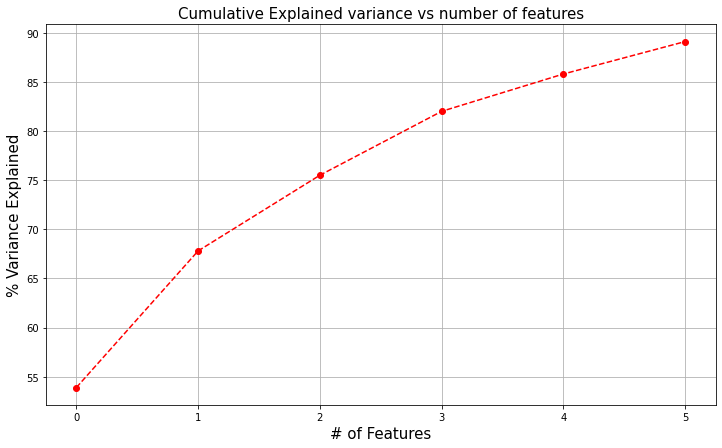

In [85]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [86]:
df = pd.DataFrame(data_reduced)
df.columns = df.columns+1
df.index = df.index+1 
df

,1,2,3,4,5,6
1,-4.719381,0.717504,1.632266,-1.524984,0.090256,-0.612573
2,-4.873297,0.492001,1.752126,-1.938533,-0.262974,0.305216
3,-6.062948,0.233751,1.333068,-0.710271,0.152171,-0.016517
4,-6.378387,0.042766,1.404373,-1.187672,0.013922,-0.177344
5,-4.581259,1.431602,1.722496,-0.231725,0.579572,0.058361
...,...,...,...,...,...,...
636,-6.150873,-1.405780,-0.232601,-0.486829,0.748189,0.245562
637,-5.656448,-1.453038,-0.310560,-0.465031,0.723289,0.242880
638,-6.180341,-1.216266,-0.346108,-0.684361,0.907056,0.548393
639,-6.108741,-1.248980,-0.279497,-0.421100,0.776502,0.305536


In [87]:
df.corr()

,1,2,3,4,5,6
1,1.000000e+00,1.560795e-16,7.849750e-17,-2.339194e-16,8.397981e-17,6.489816e-17
2,1.560795e-16,1.000000e+00,-1.778386e-16,5.751061e-17,-4.520337e-17,2.608602e-17
3,7.849750e-17,-1.778386e-16,1.000000e+00,1.661261e-16,-2.411437e-16,-6.850496e-17
4,-2.339194e-16,5.751061e-17,1.661261e-16,1.000000e+00,1.446686e-17,1.592817e-16
5,8.397981e-17,-4.520337e-17,-2.411437e-16,1.446686e-17,1.000000e+00,-2.385539e-16
6,6.489816e-17,2.608602e-17,-6.850496e-17,1.592817e-16,-2.385539e-16,1.000000e+00


 PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [88]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_pca_scaled))
df_comp.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.030070,0.030075,0.156432,0.167038,0.165702,0.161871,0.162266,0.151068,0.151483,0.027664,...,0.149445,0.139705,0.051646,0.040969,0.121254,0.115790,0.139260,0.131869,0.150220,0.131179
1,-0.162783,-0.158822,-0.128322,-0.080861,-0.101111,-0.012753,-0.011674,-0.035627,-0.047732,0.008893,...,0.154508,0.174434,0.253834,0.242224,0.181278,0.165403,0.093446,0.054069,-0.054410,-0.069474
2,-0.250129,-0.259360,-0.033498,0.063630,0.024403,0.070453,0.063515,0.035345,-0.009677,-0.201756,...,0.057198,-0.023800,0.149589,0.151083,-0.088656,-0.197795,0.058031,-0.001833,0.128955,0.086702
3,0.120049,0.110852,0.101335,0.033299,0.071948,0.007703,0.002417,-0.024603,0.002284,0.142128,...,-0.040609,0.046423,0.230440,0.265749,-0.171925,-0.086789,-0.205374,-0.207761,-0.019155,0.037790
4,0.145753,0.136167,-0.022504,-0.049227,-0.027928,-0.069415,-0.062113,-0.185394,-0.170823,0.372538,...,0.093749,0.140430,-0.016334,-0.017104,0.055508,0.105537,0.002041,0.055448,0.171164,0.248574


<AxesSubplot:>

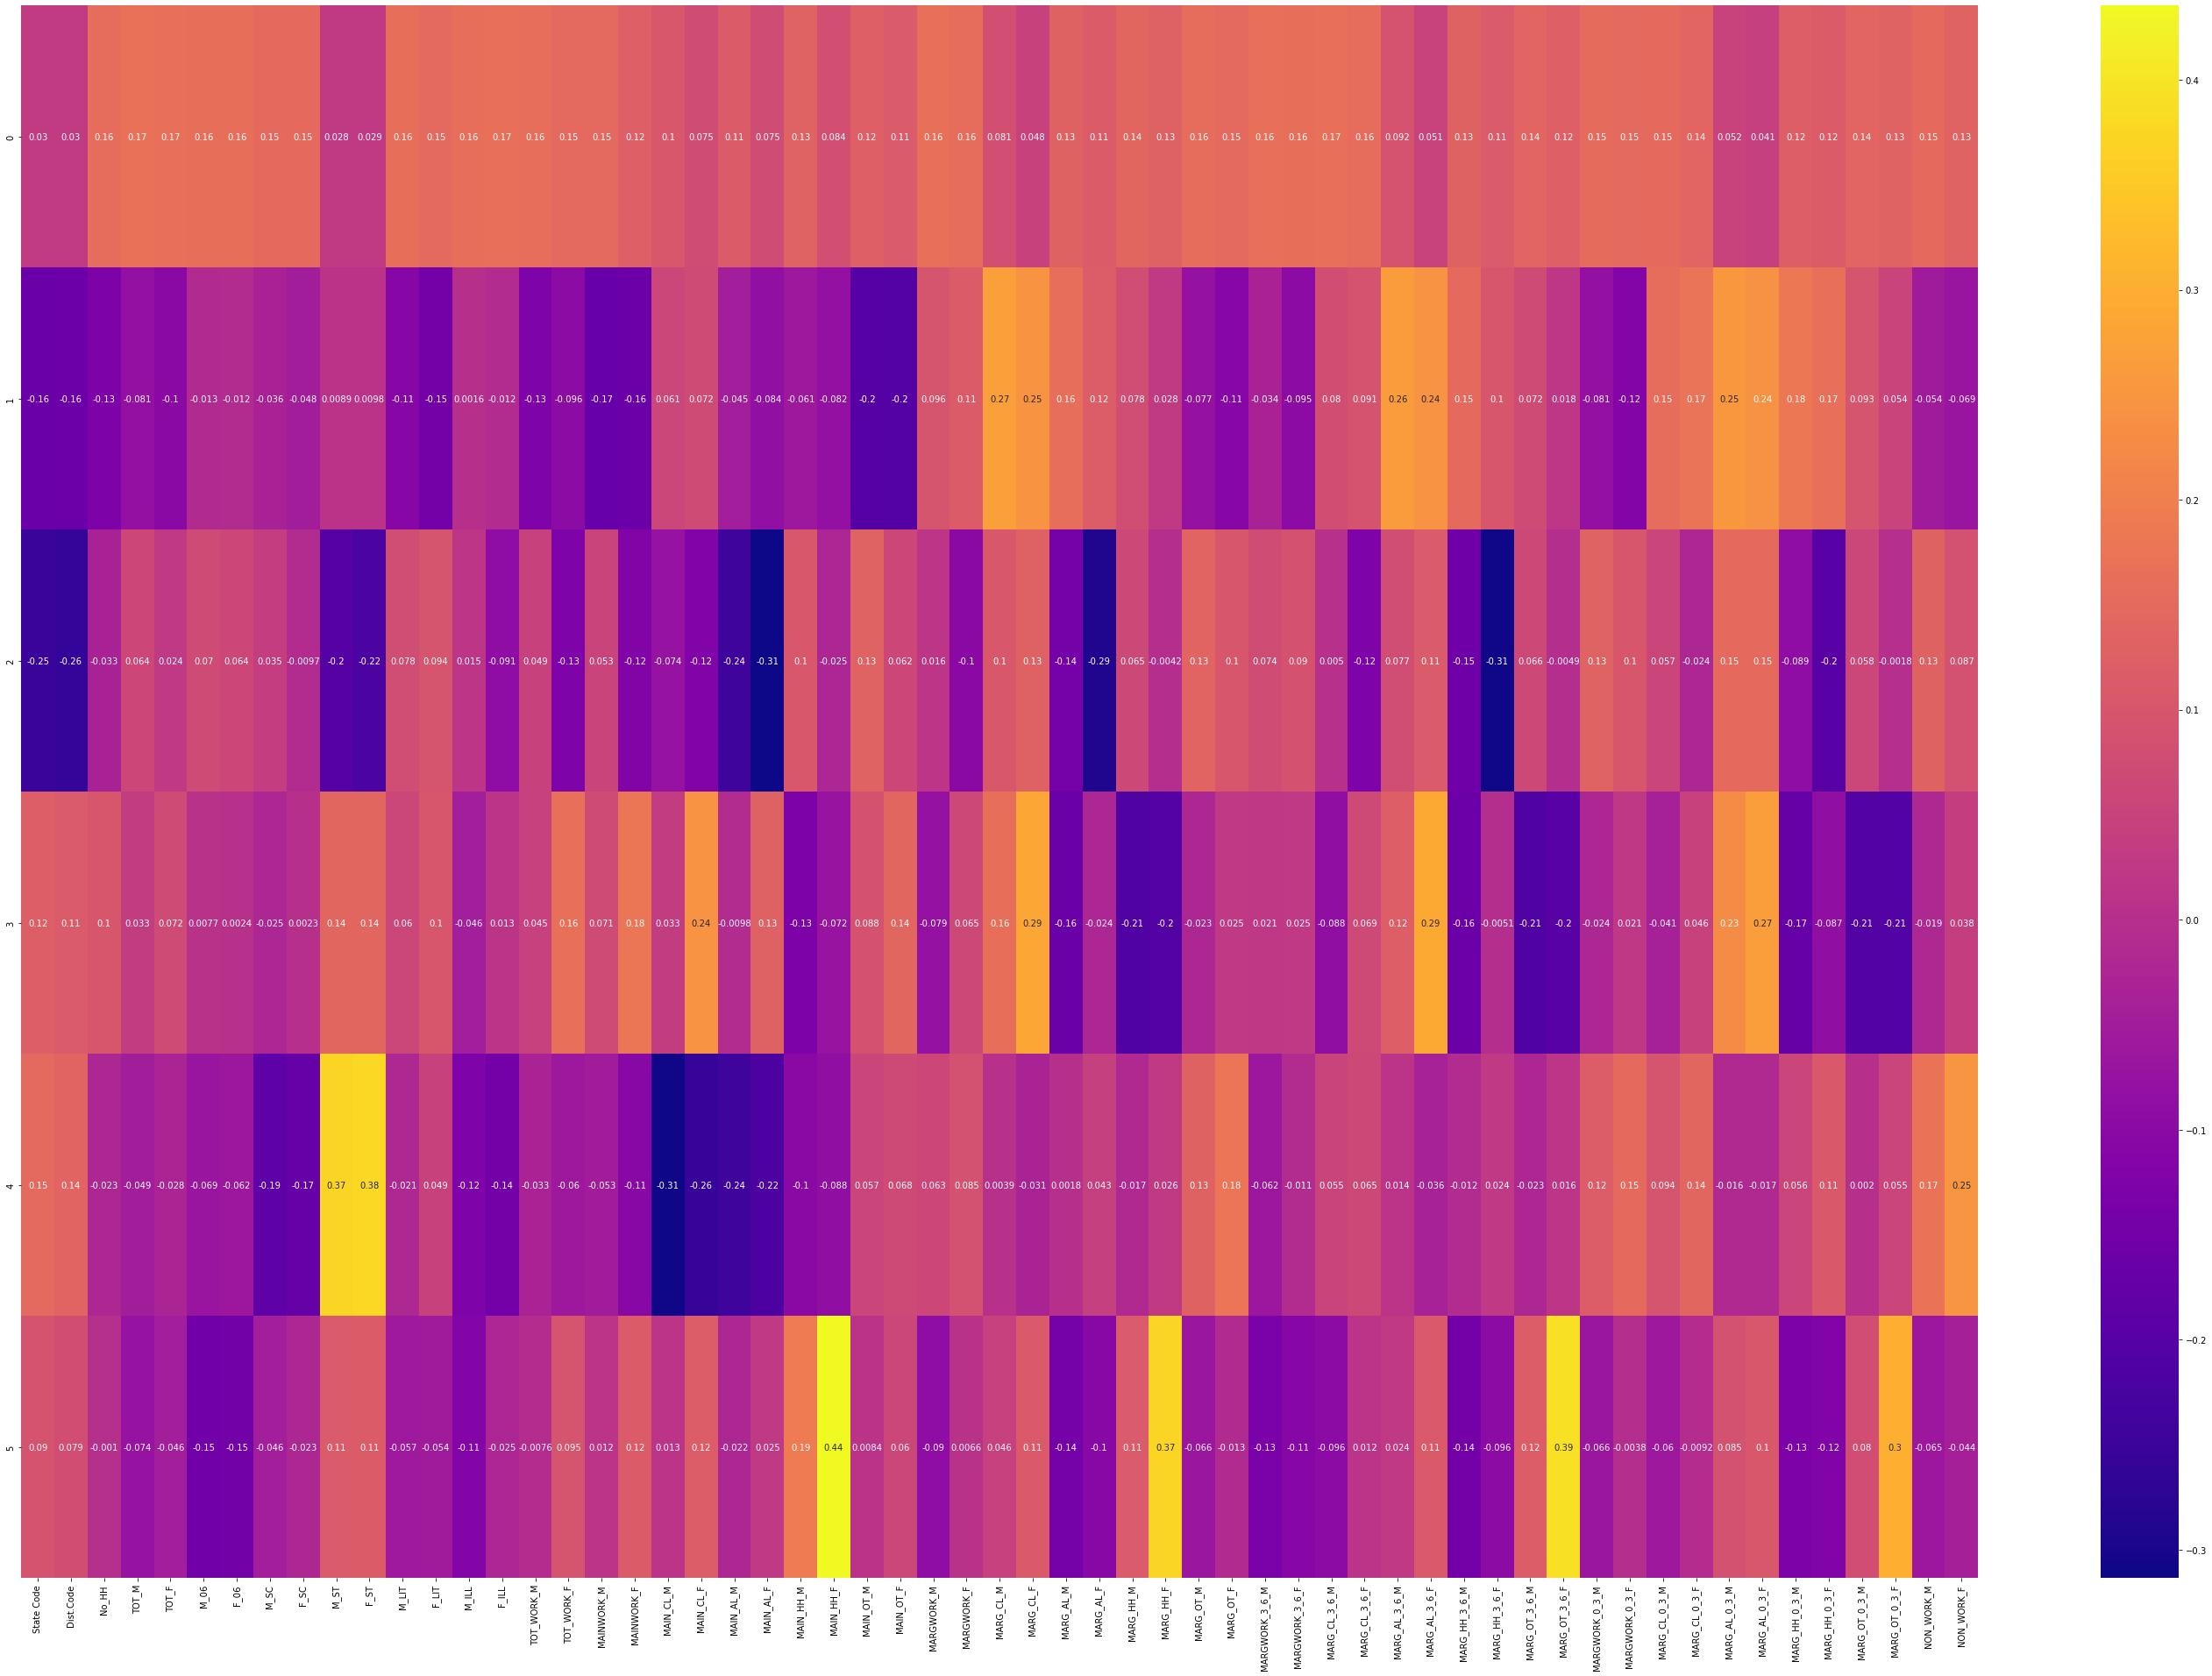

In [89]:
plt.figure(figsize=(50,33))
sns.heatmap(df_comp,annot=True,cmap='plasma',)